
- Notebook Author: [Enio Rubens][1]
- Project: **[DataCamp: Customer Lifetime Value][2]**
 - This [notebook][3] was created as a reproducible reference.
 - If you find the content interesting, consider a [DataCamp Subscription][4].

[1]: https://github.com/eniorubens
[2]: https://app.datacamp.com/learn/projects/nobel-winners
[3]: https://github.com/trenton3983/DataCamp/blob/master/2020-06-01_statistical_thinking_2.ipynb
[4]: https://www.datacamp.com/users/sign_up

# Customer Lifetime Value

# E-Commerce Data
This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts, with many of its customers being wholesalers. 

In [2]:
import pandas as pd
data = pd.read_csv('dataset/online_retail.csv', parse_dates = ['InvoiceDate'])

In [3]:
pd.read_csv('dataset/variable_explanation.csv')

,Variable,Explanation
0,InvoiceNo,A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation.
1,StockCode,A 5-digit integral number uniquely assigned to each distinct product.
2,Description,Product (item) name
3,Quantity,The quantities of each product (item) per transaction
4,InvoiceDate,The day and time when each transaction was generated
5,UnitPrice,Product price per unit in sterling (pound)
6,CustomerID,A 5-digit integral number uniquely assigned to each customer
7,Country,The name of the country where each customer resides


[Source of dataset](https://archive.ics.uci.edu/ml/datasets/online+retail#).

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Here, we can observe some of the customers have ordered in a negative quantity, centanly is about damage or for some reason a devolution. So, we need to filter Quantity greater than zero.

In [5]:
# droping price zero and below zero
data = data.drop(data[data.UnitPrice == 0].index)
data = data.drop(data[data.UnitPrice < 0].index)

# droping Quantity zero and below zero. Certanly it is about damage or quantity wrong.
data = data.drop(data[data.Quantity == 0 ].index)
data = data.drop(data[data.Quantity < 0 ].index)

data.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


# Customer Lifetime Value

Italian economist Vilfredo Pareto states that 80% of the effect comes from 20% of the causes, this is known as 80/20 rule or Pareto principle. Similarly, 80% of companies business comes from 20% customers. Companies need to identify those top customers and maintain the relationship with them to ensure continuous revenue. In order to maintain a long-term relationship with customers, companies need to schedule loyalty schemes such as the **discount, offers, coupons, bonus point, and gifts.**

Targeting a new customer is more costly than retaining existing customers because you don’t need to spend resources, time, and work hard to acquire new customers. You just have to keep the existing customers happy. Business analyst's accurately calculate customer acquisition cost using CLTV(Customer Lifetime Value). CLTV indicates the total revenue from the customer during the entire relationship. CLTV helps companies to focus on those potential customers who can bring in the more revenue in the future.

In this tutorial, you are going to cover the following topics:

- Introduction
- Customer Lifetime value(CLTV)
- Related Work of CLTV
- CLTV Formulas
- Implementing CLTV in Python

## Customer Lifetime Value(CLTV)

Customer Lifetime Value is a monetary value that represents the amount of revenue or profit a customer will give the company over the period of the relationship". CLTV demonstrates the implications of acquiring long-term customers compare to short-term customers. Customer lifetime value (CLV) can help you to answers the most important questions about sales to every company:

- How to Identify the most profitable customers?
- How can a company offer the best product and make the most money?
- How to segment profitable customers?
- How much budget need to spend to acquire customers?

In [6]:
# import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

## Top 10 customer

<AxesSubplot:>

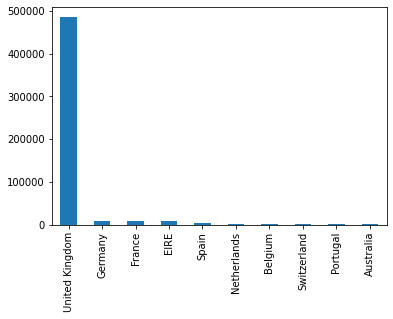

In [7]:
#Top ten country's customer
data.Country.value_counts()[:10].plot(kind='bar')

In the given dataset, we can observe most of the customers are from "United Kingdom". So, I will filter data for United Kingdom customer.

In [8]:
uk_data=data[data.Country=='United Kingdom']
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,485123.000000,485123.000000,354321.000000
mean,9.610738,3.849679,15552.486392
std,161.904143,34.677371,1594.527150
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15522.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,13541.330000,18287.000000


## Pre processing.

### How many Customers we have ?

In [9]:
total_customer = data.CustomerID.nunique()
print('Total of customer that have been purchasing from us : {}'.format(total_customer))
customer_top_20 = int(total_customer * 0.2)
print('Thus, 20% is about : {} customers'.format(customer_top_20))

Total of customer that have been purchasing from us : 4338
Thus, 20% is about : 867 customers


### What about sales ?

C:\Users\E6480~1.RUB\AppData\Local\Temp/ipykernel_13300/2852145123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['sales'] = data_sales.Quantity * data_sales.UnitPrice


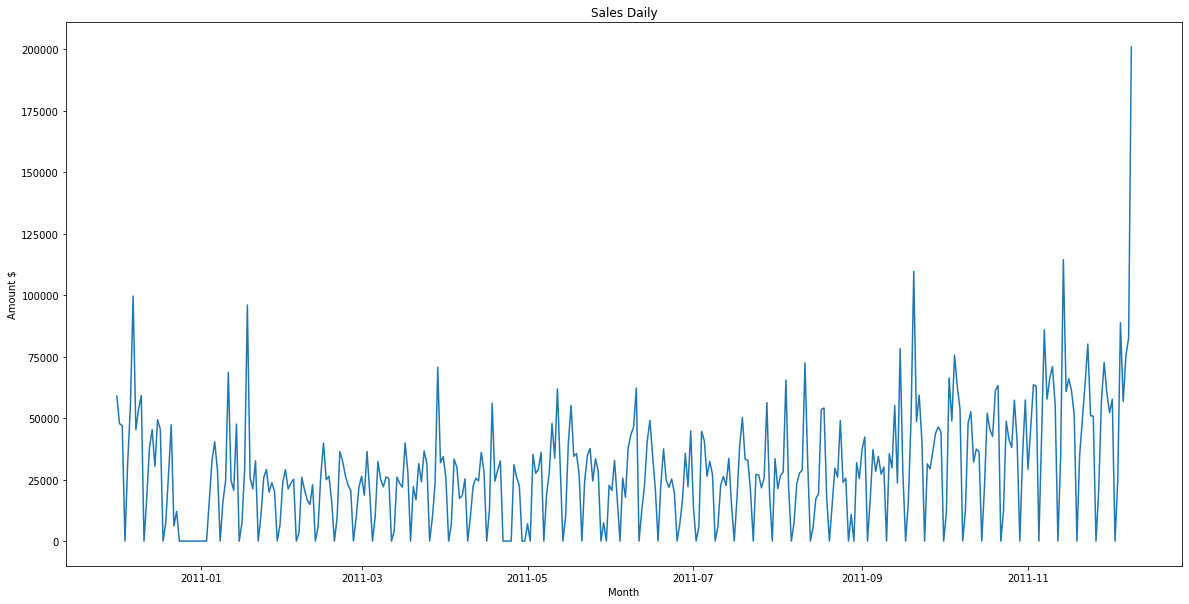

In [10]:
import matplotlib.pyplot as plt 

data_sales = data[['InvoiceDate', 'Quantity', 'UnitPrice']]
data_sales['sales'] = data_sales.Quantity * data_sales.UnitPrice
daily_sales = data_sales.groupby([pd.Grouper(key='InvoiceDate', freq='D')
                            ]).agg(daily_sales=('sales',
                                                'sum'))
_ = plt.figure(figsize=(20, 10))
_ = plt.plot(daily_sales)

_ = plt.title('Sales Daily')
_ = plt.xlabel('Month')
_ = plt.ylabel('Amount $')

## Calculate Customer Lifetime Value

There are lots of approaches available for calculating CLTV. Everyone has his/her own view on it. For computing CLTV we need historical data of customers but you will unable to calculate for new customers. To solve this problem Business Analyst develops machine learning models to predict the CLTV of newly customers. Let's explore some approaches for CLTV Calculation:
**Using the following equation:** 

CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.


### Filter required Columns

Here, you can filter the necessary columns for calculating CLTV. You only need her five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice.

- **CustomerID** will uniquely define your customers.
- **InvoiceDate** help you calculate numbers of days customer stayed with your product.
- **InvoiceNo** helps you to count the number of time transaction performed(frequency).
- **Quantity** is purchased item units in each transaction
- **UnitPrice** of each unit purchased by the customer will help you to calculate the total purchased amount.	

In [11]:
uk_data = uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
#Calulate total purchase
uk_data['TotalPurchase'] = uk_data['Quantity'] * uk_data['UnitPrice']

Here, you are going to perform the following operations:

- Calculate the number of days between the present date and the date of last purchase from each customer.
- Calculate the number of orders for each customer.
- Calculate sum of purchase price for each customer.

In [12]:
uk_data_group=uk_data.groupby('CustomerID').agg({
    						'InvoiceDate': lambda date: (date.max() - date.min()).days,
                            'InvoiceNo': lambda num: len(num),
                            'Quantity': lambda quant: quant.sum(),
                            'TotalPurchase': lambda price: price.sum()})
uk_data_group = uk_data_group.sort_values('TotalPurchase', ascending=False)                                        
uk_data_group.head(10) 

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase
CustomerID,,,,
18102.0,366,431,64124,259657.30
17450.0,359,337,69993,194550.79
16446.0,204,3,80997,168472.50
17511.0,370,963,64549,91062.38
16029.0,335,242,40208,81024.84
12346.0,0,1,74215,77183.60
16684.0,353,277,50255,66653.56
14096.0,97,5111,16352,65164.79
13694.0,369,568,63312,65039.62


### Rename the column	

In [13]:
# Change the name of columns
uk_data_group.columns=['num_days','num_transactions','num_units','spent_money']
uk_data_group.head(10)

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
18102.0,366,431,64124,259657.30
17450.0,359,337,69993,194550.79
16446.0,204,3,80997,168472.50
17511.0,370,963,64549,91062.38
16029.0,335,242,40208,81024.84
12346.0,0,1,74215,77183.60
16684.0,353,277,50255,66653.56
14096.0,97,5111,16352,65164.79
13694.0,369,568,63312,65039.62


### Calculate CLTV using following formula:


 CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

 Customer Value = Average Order Value * Purchase Frequency


#### 1. Calculate Average Order Value
**Average Order Value(AOV):** The Average Order value is the ratio of your total revenue and the total number of orders. AOV represents the mean amount of revenue that the customer spends on an order.

In [14]:
# Average Order Value
uk_data_group['avg_order_value']=uk_data_group['spent_money']/uk_data_group['num_transactions']
uk_data_group = uk_data_group.sort_values(['avg_order_value'], ascending = False)
uk_data_group.columns = uk_data_group.columns.str.strip()
pd.options.display.float_format = '{:20,.2f}'.format
uk_data_group.head(10)

,num_days,num_transactions,num_units,spent_money,avg_order_value
CustomerID,,,,,
"12,346.00",0,1,74215,"77,183.60","77,183.60"
"16,446.00",204,3,80997,"168,472.50","56,157.50"
"15,098.00",0,3,121,"39,916.50","13,305.50"
"15,749.00",97,10,18028,"44,534.30","4,453.43"
"15,195.00",0,1,1404,"3,861.00","3,861.00"
"13,135.00",0,1,4300,"3,096.00","3,096.00"
"17,846.00",0,1,1,"2,033.10","2,033.10"
"18,087.00",192,2,3907,"4,055.72","2,027.86"
"16,532.00",320,4,2016,"6,748.80","1,687.20"


### 2. Calculate Purchase Frequency(PF):

Purchase Frequency is the ratio of the total number of orders and the total number of customer. It represents the average number of orders placed by each customer.

Purchase Frequency =  Total Number of Orders / Total Number of Customers

In [15]:
purchase_frequency = sum(uk_data_group['num_transactions']) / uk_data_group.shape[0]
purchase_frequency

90.38801020408164

#### 3. Calculate Repeat Rate and Churn Rate

**Repeat Rate:** Repeat rate can be defined as the ratio of the number of customers with more than one order to the number of unique customers. Example: If you have 10 customers in a month out of who 4 come back, your repeat rate is 40%.

**Churn Rate:** Churn Rate is the percentage of customers who have not ordered again. Customer churn also goes by terms such as customer attrition, customer turnover and customer defection. It refers to the net percentage of customers you lose over the course of a month or another selected time frame.

In [16]:
# Repeat Rate
repeat_rate = uk_data_group[uk_data_group.num_transactions > 1].shape[0]/uk_data_group.shape[0]
#Churn Rate
churn_rate = 1 - repeat_rate
purchase_frequency,repeat_rate,churn_rate

(90.38801020408164, 0.9821428571428571, 0.017857142857142905)

### 4. Calculate Profit Margin

Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let's assume our business has approx 5% profit on the total sale.

In [17]:
# Profit Margin
uk_data_group['profit_margin'] = uk_data_group['spent_money'] * 0.05
uk_data_group = uk_data_group.sort_values('profit_margin', ascending=False)
uk_data_group.head(10)

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
CustomerID,,,,,,
"18,102.00",366,431,64124,"259,657.30",602.45,"12,982.86"
"17,450.00",359,337,69993,"194,550.79",577.30,"9,727.54"
"16,446.00",204,3,80997,"168,472.50","56,157.50","8,423.62"
"17,511.00",370,963,64549,"91,062.38",94.56,"4,553.12"
"16,029.00",335,242,40208,"81,024.84",334.81,"4,051.24"
"12,346.00",0,1,74215,"77,183.60","77,183.60","3,859.18"
"16,684.00",353,277,50255,"66,653.56",240.63,"3,332.68"
"14,096.00",97,5111,16352,"65,164.79",12.75,"3,258.24"
"13,694.00",369,568,63312,"65,039.62",114.51,"3,251.98"


### 5. Calcualte Customer Lifetime Value

**Customer Lifetime:** Customer Lifetime is the period of time that the customer has been continuously ordering.

In [18]:
# Customer Value
uk_data_group['CLV'] = (uk_data_group['avg_order_value'] * purchase_frequency) / churn_rate
#Customer Lifetime Value
uk_data_group['cust_lifetime_value'] = uk_data_group['CLV'] * uk_data_group['profit_margin']
uk_data_group = uk_data_group.sort_values('cust_lifetime_value', ascending=False)
uk_data_group.head(10)

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
"16,446.00",204,3,80997,"168,472.50","56,157.50","8,423.62","284,254,022.25","2,394,449,288,175.65"
"12,346.00",0,1,74215,"77,183.60","77,183.60","3,859.18","390,682,433.37","1,507,713,833,196.29"
"15,098.00",0,3,121,"39,916.50","13,305.50","1,995.83","67,348,829.51","134,416,477,651.09"
"15,749.00",97,10,18028,"44,534.30","4,453.43","2,226.72","22,542,053.87","50,194,729,487.27"
"18,102.00",366,431,64124,"259,657.30",602.45,"12,982.86","3,049,454.23","39,590,652,623.70"
"17,450.00",359,337,69993,"194,550.79",577.30,"9,727.54","2,922,146.27","28,425,293,247.35"
"17,949.00",370,70,30546,"58,510.48",835.86,"2,925.52","4,230,916.69","12,377,648,320.43"
"16,029.00",335,242,40208,"81,024.84",334.81,"4,051.24","1,694,734.49","6,865,779,562.20"
"15,769.00",363,130,29672,"56,252.72",432.71,"2,812.64","2,190,276.92","6,160,451,724.78"


### Conclusion :

So, now we que see that 20 % top customer represents 80% of company's profit.
My best advice would be to schedule loyalty schemes such as the **discount, offers, coupons, bonus point, and gifts** to them.

In [19]:
values_20_top = uk_data_group.cust_lifetime_value.nlargest(customer_top_20).sum()
values_others = uk_data_group.cust_lifetime_value.nsmallest(total_customer-customer_top_20).sum()

print('Top 20% customer profitble, is about ${:,.2f}'.format(values_20_top))
print('The others 80% customers represents around ${:,.2f}'.format(values_others))

Top 20% customer profitble, is about $4,274,249,891,876.22
The others 80% customers represents around $14,075,584,723.26
